#**Sanjeev Das**

---

In this we will be estimating percentage a student can score if  they study for particular number of hours.

We will be using linearRegression model of scikit-learn 

In [ ]:
#packages for datamanipulation
import numpy as np
import pandas as pd

#ploting library
import matplotlib.pyplot as plt
#library to make graph look better
import seaborn as sns

#magical line only for notebook 
%matplotlib inline

In [ ]:
#reading data from link
url="http://bit.ly/w-data"

#using panda to read csv file 
data=pd.read_csv(url)
print("Data has been imported ... sanity check")

Data has been imported ... sanity check


#**Data Exploration** 
---
Data exploration is a very important step to understand the data

we can use various function and plotting method to understand it

In [ ]:
#checking data first-five rows
data.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Data Exploration
#description about data only for numerical columns
print("DATA DESCRIBTION")
print(data.describe())

DATA DESCRIBTION
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [ ]:
#Quick check for the detail of columns
print("DATA INFO")
print(data.info())

#to check the shape of the given data
print("\nDATA SHAPE is ",data.shape)

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

DATA SHAPE is  (25, 2)


---
###To Check does that data have any null or not

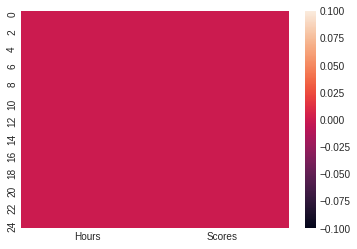

In [ ]:
#To check if we have no null data
sns.heatmap(data.isnull())
plt.show()
#if single color isn't there means there are null values
#if yes you will have to process the data of remove the null rows or columns

---
###Trying to plot the data and finding a trend between Hours and Scores 

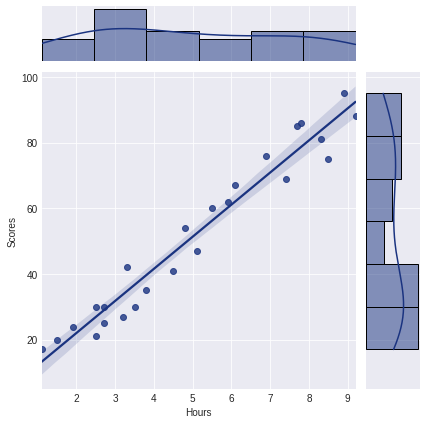

In [ ]:
#style the background 
plt.style.use("seaborn-darkgrid")
#using seaborn to plot the data and check relationship between Hours and Scores
sns.jointplot(x="Hours",y="Scores",data=data,color=(0.1, 0.2, 0.5),kind='reg')
plt.show()

###In the above Plot a linear relation can be seen 


---

#**Data Prepocessing**
---
Making the data ready for training and spliting it into two groups 

Train Data and Test Data

In [ ]:
#seperating target values and feature(s)(2d array) values
X=data.iloc[:,:-1].values 
Y=data.iloc[:,1].values 

In [ ]:
#model to split the data in test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=101) 
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0) 

#**Creating a model** 
---
Creating a model and fitting the data to it
and predicting values

In [ ]:
from sklearn.linear_model import LinearRegression
#initiating linear regression model
model=LinearRegression()
#fitting the data to to model
model.fit(X_train,y_train)
print("Model is trained")

Model is trained


---
###Predicting Value for the Test Data

In [ ]:
#Model is predicting against the test data
pred_y=model.predict(X_test)
pred_y

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

##**Comparing the Predicted Values and Actual Values**
---
###Graphically way of comparing

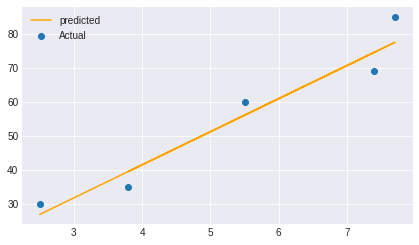

In [ ]:
#graphical representation of predicted and actual value
plt.figure(figsize=(7,4))
plt.plot(X_test,pred_y,label="predicted",color="orange")
plt.scatter(X_test,y_test,label="Actual")
plt.legend()
plt.show()

---
###Tabular way of comparing

In [ ]:
#Tabular representation of predicted and actual values
pd.DataFrame({"Actual Value":y_test,"Predicted Value":pred_y})

,Actual Value,Predicted Value
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


---
###Estimating Percentage for **9.25 hours**

In [ ]:
#input requires 2D array
hours=[[9.25]]
#Center is use to make it look in the center
print("PREDICTION FROM THE MODEL".center(60))
#model to predict the value and print it 
print(f"If student studies for {hours[0][0]} then they are expcted to score {model.predict(hours)[0] :.3f} % ")

#Note the predicted value may differ based on which data (random state of traintestsplit) is used to train the model
#Change the random state and predict the same value

                 PREDICTION FROM THE MODEL                  
If student studies for 9.25 then they are expcted to score 92.545 % 


##Metrics to Check how your model has performed

In [ ]:
#some matrix to check how our model is performed
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute Error ",mean_absolute_error(y_test,pred_y))

#the value will be high cause it punishes the model to for smaller difference also
print("Mean Squared Error ",mean_squared_error(y_test,pred_y))

Mean Absolute Error  4.937597792467706
Mean Squared Error  26.675642597052256
